# K-Means
- Common clustering technique, helps to solve many problems efficiently.
- K-Means is an example of Hard Clustering, where every point belongs only to one cluster.

## Motivation Problem - *Pizza Parlour Study*

**Problem Statement** Given the list of locations of customers who frequently order Pizza we want to find out optimal locations of Pizza Parlours where they should be opened.

<img src="pizza1.png" alt="Pizza-1" style="width: 400px;"/>

**Step-1** : Initialise Pizza Parlour Centers randomly.
<img src="pizza2.png" alt="Pizza-2" style="width: 400px;"/>

**Step-2** : Assign each customer to its nearest Pizza Center.
<img src="pizza3.png" alt="Pizza-3" style="width: 400px;"/>

**Step-3** : Update the Center Location by taking mean of customers assigned to it.
<img src="pizza4.png" alt="Pizza-4" style="width: 400px;"/>

**Step-4** : Repeat Steps 2 and 3 Until Convergence.
<img src="pizza5.png" alt="Pizza-5" style="width: 400px;"/>

## K-Means Algorithm

**Input Data** : X = {x1,...,xN}

**Goal** : Partition the data among some K number of clusters. Let us assume K is known to us.

Let µk denote the center of Kth Cluster (uk will be vector)

So we need to ﬁnd an assignment of data points to clusters,
as well as a set of cluster centers{µk}, such that the sum of the squares 
of the distances of each data point to its closest cluster center µk, is a minimum. 




<img src="k-means.png" alt="Pizza-1" style="width: 600px;"/>


## Implementation



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

/home/nitish/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
X,y=make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

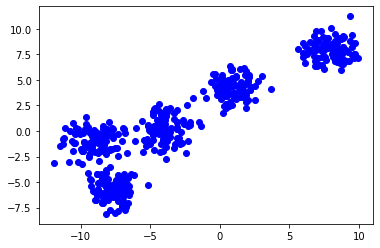

In [3]:
plt.figure(0)
plt.scatter(X[:,0],X[:,1],c='blue')
plt.show()

In [4]:
X.shape

(500, 2)

## Dataset Preparation

In [5]:
clusters={}
k=5
color  = ["green","red","blue","yellow","orange"]
##center,##color,##points

for i in range(k):
    point=[]
    center = 10*(2*np.random.random((X.shape[1],))-1)
    cluster={'points':point,
            'color':color[i],
            'center':center}
    clusters[i]=cluster

In [6]:
clusters

{0: {'points': [],
  'color': 'green',
  'center': array([4.83202641, 6.85064725])},
 1: {'points': [], 'color': 'red', 'center': array([5.98465403, 6.75841404])},
 2: {'points': [],
  'color': 'blue',
  'center': array([-0.31947279,  4.07588739])},
 3: {'points': [],
  'color': 'yellow',
  'center': array([-1.48673408, -6.49630806])},
 4: {'points': [],
  'color': 'orange',
  'center': array([-7.80655637,  8.87846905])}}

In [7]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [8]:
distance(np.array([1,2]),np.array([3,4]))

2.8284271247461903

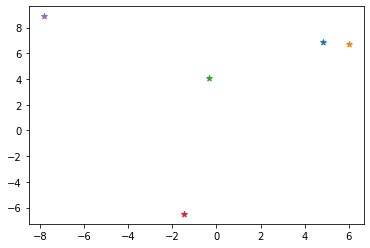

In [9]:

for i in range(k):
    plt.scatter(clusters[i]['center'][0],clusters[i]['center'][1],marker='*')


In [10]:
def assignPointsTocluster(clusters):
    for i in range(X.shape[0]):
        cur_x=X[i]
        dist=[]
        for ix in range(k):
            d=distance(cur_x,clusters[ix]['center'])
            dist.append(d)
        min_cluster=np.argmin(dist)
        clusters[min_cluster]['points'].append(cur_x)      
def update_clusters(clusters):
    
    
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        if pts.shape[0]>0:
            new_u=pts.mean(axis=0)
            clusters[kx]['center']=new_u
            clusters[kx]['points']=[]
def plot_points(clusters):
    for i in range(k):
        pts=np.array(clusters[i]['points'])
        try:
            plt.scatter(pts[:,0],pts[:,1],c=clusters[i]['color'])
        except:
            pass
        center=clusters[i]['center']
        plt.scatter(center[0],center[1],marker='*',c='black')              

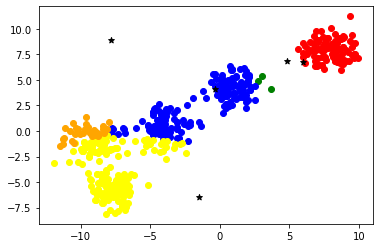

In [12]:
assignPointsTocluster(clusters)
plot_points(clusters)

array([[-4.30966728e+00,  4.64720131e-01],
       [ 3.67547163e-01,  3.42549161e+00],
       [ 7.83015344e+00,  6.45191895e+00],
       [-4.61279528e+00, -3.23718160e-01],
       [ 9.87858973e+00,  8.25212405e+00],
       [-3.83108938e+00,  1.84312571e+00],
       [ 2.24942910e+00,  4.31194285e+00],
       [ 1.89024377e+00,  2.86941982e+00],
       [-4.50348991e+00,  3.67682476e-01],
       [-4.27714282e+00, -3.10635675e-01],
       [-5.66856329e+00,  1.62517906e+00],
       [ 1.65912133e+00,  4.41204316e+00],
       [ 1.81718201e-01,  5.50794891e+00],
       [ 6.57270976e+00,  6.78213995e+00],
       [ 4.70598104e-01,  2.61647914e+00],
       [ 6.59687292e-01,  2.41981542e+00],
       [-3.11468967e+00,  8.57972760e-01],
       [ 5.91386682e+00,  6.76613883e+00],
       [ 8.27732011e+00,  7.03345544e+00],
       [-6.21229878e+00, -7.44223006e-01],
       [ 2.02914149e+00,  5.01575429e+00],
       [ 7.94390314e+00,  9.02364127e+00],
       [ 7.93803128e+00,  6.96109831e+00],
       [ 7.

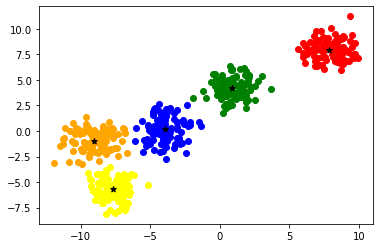

In [18]:

assignPointsTocluster(clusters)
plot_points(clusters)
update_clusters(clusters)

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the '/snap/jupyter/6/bin/python -m pip install --upgrade pip' command.


(1, 2)

array([ 8, -9])

<function RandomState.random>

In [15]:
#center = 10*(2*np.random.random((X.shape[1],))-1)
#print(center)

In [16]:
#clusters

# using scikit_learn

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [17]:
X,y=make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

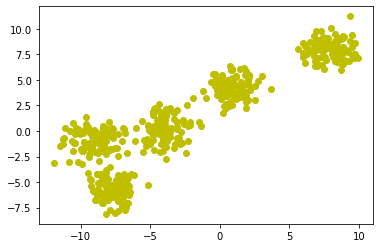

In [18]:
plt.scatter(X[:,0],X[:,1],c='y')

In [19]:
from sklearn.cluster import KMeans

In [21]:
km=KMeans(n_clusters=5)

In [22]:
km.fit(X)

KMeans(n_clusters=5)

In [26]:
cluster_centers=km.cluster_centers_

In [31]:
print(cluster_centers)

[[-3.97953526  0.19458336]
 [ 7.8649674   7.97988109]
 [-7.6726196  -5.69211059]
 [ 0.88641907  4.19441853]
 [-9.0671623  -0.96740759]]


In [27]:
preds=km.labels_

In [33]:
preds

array([2, 1, 0, 2, 2, 0, 4, 2, 1, 2, 1, 0, 1, 2, 0, 2, 1, 2, 2, 1, 3, 3,
       2, 0, 2, 3, 4, 4, 0, 4, 2, 4, 3, 3, 2, 3, 1, 1, 2, 3, 3, 3, 4, 4,
       0, 1, 1, 4, 4, 4, 1, 2, 4, 2, 2, 3, 2, 2, 1, 0, 1, 0, 0, 2, 4, 1,
       0, 0, 3, 0, 3, 2, 3, 2, 3, 0, 2, 4, 3, 3, 0, 3, 0, 4, 1, 4, 0, 1,
       4, 0, 4, 3, 2, 3, 3, 1, 2, 0, 0, 3, 1, 3, 0, 0, 1, 1, 1, 0, 0, 2,
       1, 4, 2, 1, 0, 3, 1, 4, 3, 0, 1, 0, 4, 2, 3, 4, 4, 4, 2, 2, 0, 0,
       2, 1, 1, 4, 0, 4, 0, 2, 2, 3, 0, 1, 4, 2, 1, 1, 2, 0, 2, 2, 0, 0,
       1, 3, 3, 4, 0, 2, 3, 1, 4, 3, 1, 3, 1, 3, 3, 3, 4, 2, 3, 1, 3, 4,
       2, 0, 1, 4, 1, 2, 1, 3, 4, 4, 3, 2, 0, 1, 3, 0, 4, 2, 4, 3, 0, 4,
       2, 2, 2, 3, 3, 1, 2, 4, 4, 2, 1, 2, 2, 2, 3, 1, 0, 1, 2, 2, 1, 4,
       0, 4, 4, 3, 2, 0, 2, 0, 4, 3, 0, 0, 2, 3, 2, 3, 0, 1, 0, 3, 3, 1,
       2, 2, 0, 0, 3, 1, 3, 2, 4, 1, 4, 2, 4, 4, 4, 4, 1, 3, 1, 2, 3, 1,
       4, 0, 1, 1, 1, 4, 2, 2, 0, 3, 3, 1, 0, 0, 2, 0, 4, 0, 1, 1, 4, 4,
       3, 4, 4, 1, 3, 2, 0, 3, 0, 4, 0, 0, 1, 2, 3,

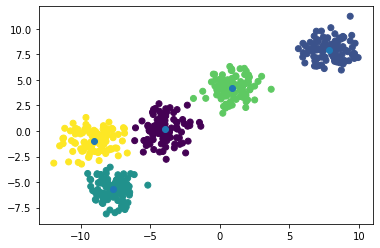

In [29]:
plt.scatter(X[:,0],X[:,1],c=preds)
plt.scatter(cluster_centers[:,0],cluster_centers[:,1])

In [42]:
preds=kmeans.labels_

In [40]:
X.shape

(500, 2)

In [9]:
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_moons

In [41]:
from sklearn.cluster import DBSCAN

In [42]:
db=DBSCAN(eps=0.3,min_samples=5)

In [43]:
X,y=make_moons(n_samples=100,noise=0.1)

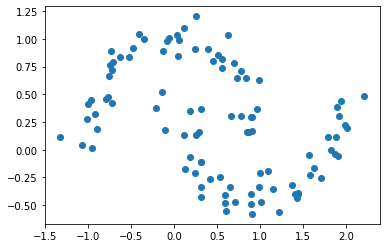

In [44]:
plt.scatter(X[:,0],X[:,1])

In [45]:
db.fit(X)

DBSCAN(eps=0.3)

In [46]:
preds=db.labels_

In [49]:
db.fit_predict(X)

array([ 0,  1,  0,  1,  1,  0,  1,  0,  1,  0,  0,  1,  1,  1,  0,  0,  1,
        0,  0,  0,  0,  0,  1,  1,  1,  0,  1,  0,  1,  1,  0,  0,  1,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  0,  0,  1,  1,  1,  1,
        1,  0,  1,  0,  0,  0,  1,  1,  0,  1,  0,  0,  0,  1,  0,  0,  0,
        0,  1,  1,  0,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  0,  1,
        0,  1,  0,  0,  1,  0,  0,  0, -1,  1,  0,  1,  1, -1,  0])

In [48]:
print(preds)

[ 0  1  0  1  1  0  1  0  1  0  0  1  1  1  0  0  1  0  0  0  0  0  1  1
  1  0  1  0  1  1  0  0  1  1  0  1  0  1  0  1  0  1  0  1  0  0  0  1
  1  1  1  1  0  1  0  0  0  1  1  0  1  0  0  0  1  0  0  0  0  1  1  0
  1  1  1  0  1  0  1  1  1  1  1  0  1  0  1  0  0  1  0  0  0 -1  1  0
  1  1 -1  0]


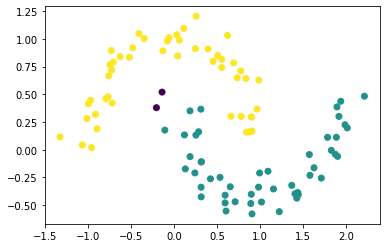

In [47]:
plt.scatter(X[:,0],X[:,1],c=preds)

In [86]:
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


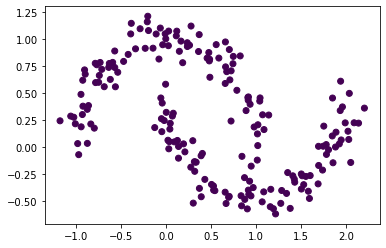

In [87]:
plt.scatter(X[:,0],X[:,1],c=pred)